# Classifying White Wine Based on Data from Physicochemical Tests 

Authors: Peter Lee, Kashish Joshipura, Eric Huang

## Loading in the required libraries used for classification of the data

In [ ]:
library(tidyverse)
library(repr)
library(tidymodels)
library(kknn)
# install.packages("ggplot2")       
# install.packages("GGally")
library("ggplot2")                     
library("GGally")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   1.0.0 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.3     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ 

## Introduction

In this project, we attempt to build a classification model using the k-nearest neighbor algorithm to classify the wine only based on the physicochemical variable. This model can help the wine rating association or connoisseur understand the relationship between physicochemical and sensory factors better, and thus determine the rate of the wine more accurately or more objectively.  While the average wine enjoyer doesn't know much about wine other than it is made from grapes and fermented. Therefore our group decided to dig deeper into the production of wine and how it determines the quality of it. In this project we would like to see which factors plays the most significant role in terms of wine quality and how significant they are. By using k-nearest neighbor we are able to group each variables to test each of their correlation with the quality itself. We will also be using cross validation to confirm our prediction results with our training data to verify the authenticity of our model. We hope that this project is able to help you get a better insight our your "average" wine that you are drinking. 

## Method

## Data

### Brief

The data set used in this project is 12 characteristics of the Portuguese "Vinho Verde" wine collected during Oct., 2009 from [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality).

### Reading in the white wine dataset from Jupyter

In [ ]:
data = read_delim("data/winequality-white.csv", ";")

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Cleaning the data
Data cleaning was performed as following steps:  
1. Changing the column names so they don't have spaces in between them <br>
2. Labelling the white wine quality as categorical values and setting them as a factor for the dataset<br>
3. Set each column as a double expect quality column

In [ ]:
new_names <- c("fixed_acidity", "volatile_acidity", "citric_acid", "residual_sugar", "chlorides", "free_sulfur_dioxide", "total_sulfur_dioxide", "density", "pH", "sulphates", "alcohol", "quality")
data <- rename(data, !!!setNames(names(data), new_names))

# colnames(data)
data$quality <- as.integer(data$quality)
data$fixed_acidity<- as.double(data$fixed_acidity)
data$volatile_acidity<- as.double(data$volatile_acidity)
data$citric_acid<- as.double(data$citric_acid)
data$residual_sugar<- as.double(data$residual_sugar)
data$free_sulfur_dioxide<- as.double(data$free_sulfur_dioxide)
data$total_sulfur_dioxide<- as.double(data$total_sulfur_dioxide)
data$chlorides<- as.double(data$chlorides)
data$density<- as.double(data$density)
data$pH<- as.double(data$pH)
data$sulphates<- as.double(data$sulphates)
data$alcohol<- as.double(data$alcohol)
data$quality[data$quality==1] = "unsatisfactory"
data$quality[data$quality==2] = "unsatisfactory"
data$quality[data$quality==3] = "unsatisfactory"
data$quality[data$quality==4] = "unsatisfactory"
data$quality[data$quality==5] = "average"
data$quality[data$quality==6] = "average"
data$quality[data$quality==7] = "Great"
data$quality[data$quality==8] = "Great"
data$quality[data$quality==9] = "Great"
data$quality = as.factor(data$quality)
table(data$quality)
data


       average          Great unsatisfactory 
          3655           1060            183 

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,average
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,average
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,average
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,average
7.2,0.23,0.32,8.50,0.058,47,186,0.9956,3.19,0.40,9.9,average
8.1,0.28,0.40,6.90,0.050,30,97,0.9951,3.26,0.44,10.1,average
6.2,0.32,0.16,7.00,0.045,30,136,0.9949,3.18,0.47,9.6,average
7.0,0.27,0.36,20.70,0.045,45,170,1.0010,3.00,0.45,8.8,average
6.3,0.30,0.34,1.60,0.049,14,132,0.9940,3.30,0.49,9.5,average


## Analysis

### Counting and graphinh all the different quality of wines

quality,n
<fct>,<int>
average,3655
Great,1060
unsatisfactory,183


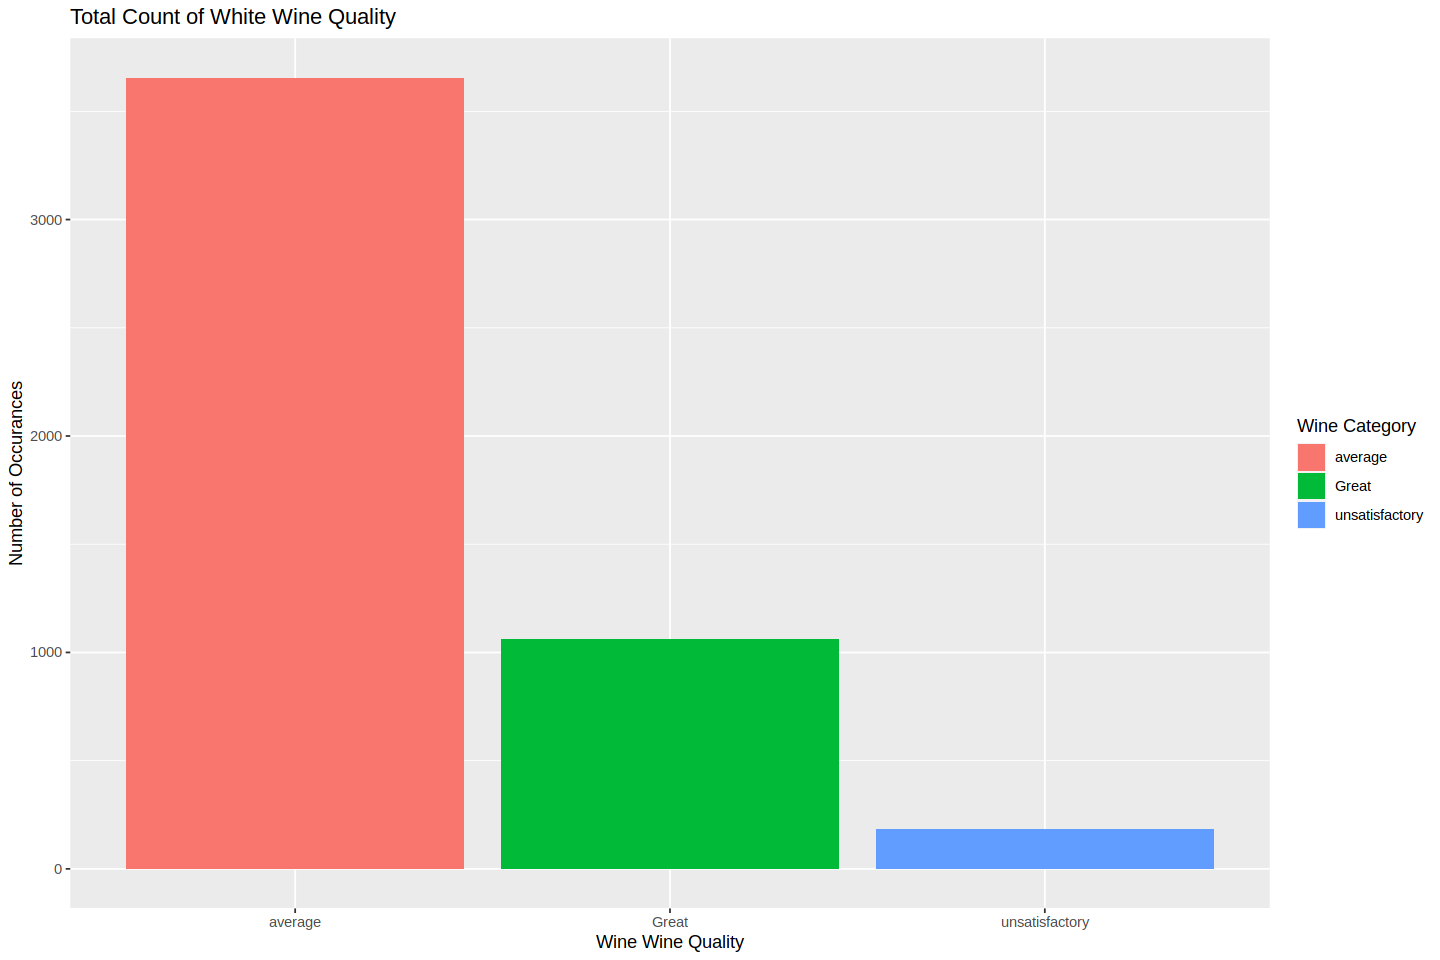

In [ ]:
options(repr.plot.width = 12, repr.plot.height = 8)
data %>%
  group_by(quality) %>%
  tally()

quality_distribution <- data %>% 
    ggplot(aes(x = quality, fill = quality)) +
    geom_bar() +
    labs(x = "Wine Wine Quality", y = "Number of Occurances", fill = "Wine Category") +
    ggtitle("Total Count of White Wine Quality")
quality_distribution

**Table.1. & Figure. 1. Total Count of White Wine Quality**

### Looking at the correlation between all predictors and the predicted

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


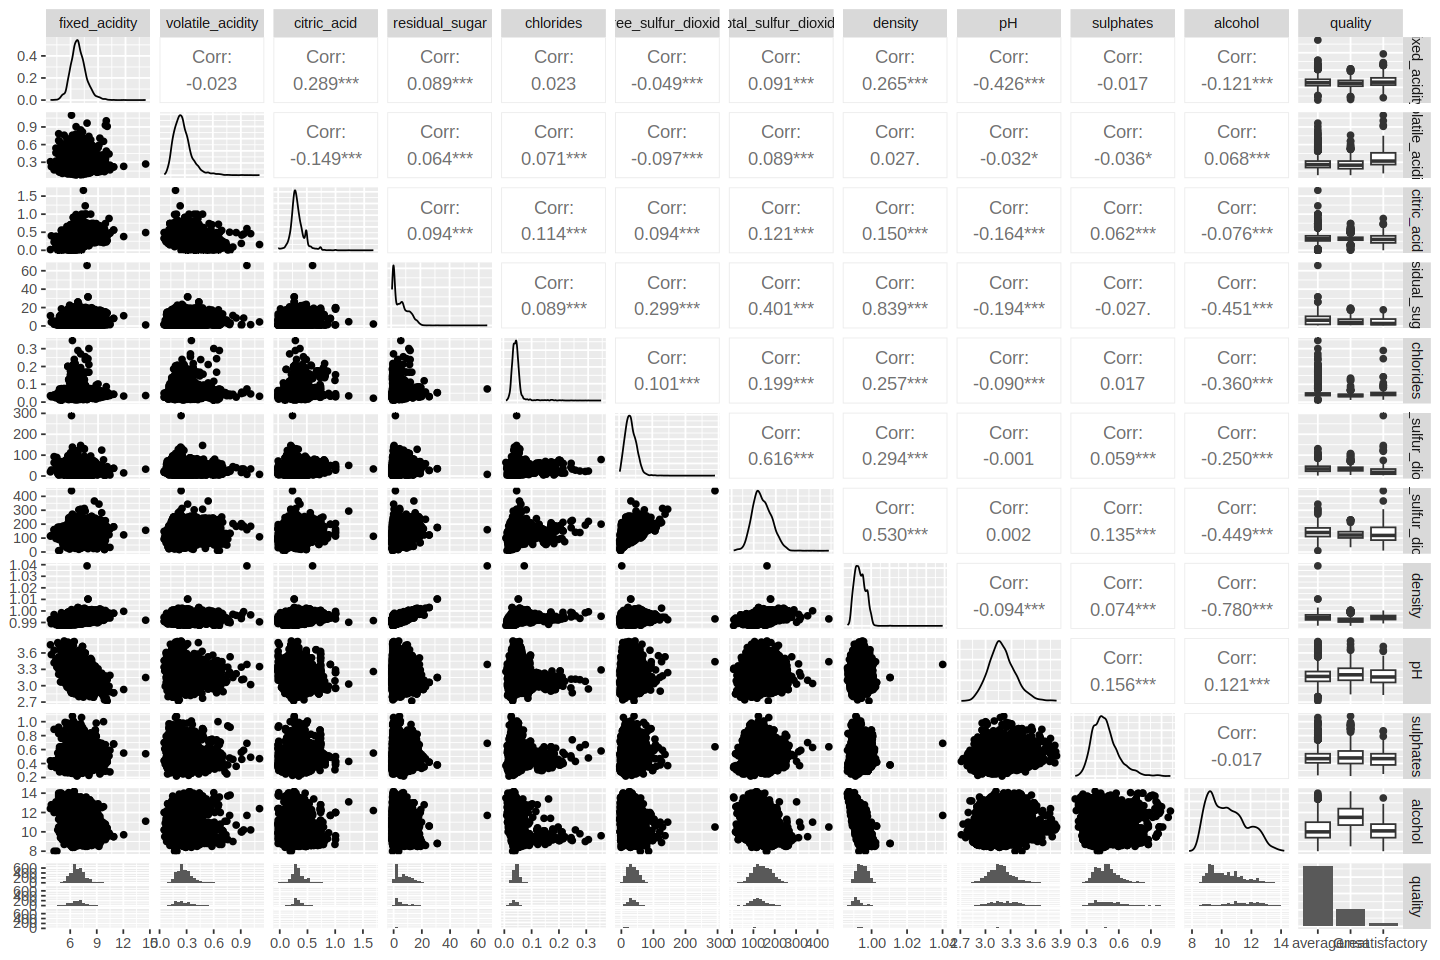

In [ ]:
ggpairs(data)

**Figure.2. Correlation between predictor variables and response variable**

### Splitting a training and testing data set and creating a recipe for it

In [ ]:
set.seed(5678)

split <- initial_split(data, prop = 0.75, strata = quality)
training <- training(split)
testing <- testing(split)

In [ ]:
set.seed(5678)
recipe <- recipe(quality ~ . , data = data)%>%
    step_center(all_predictors()) %>%
    step_scale(all_predictors())
recipe
     

Recipe

Inputs:

      role #variables
   outcome          1
 predictor         11

Operations:

Centering for all_predictors()
Scaling for all_predictors()

### Making a 10-fold cross validation for wine quality training data set


In [ ]:
set.seed(5678)

vfold <- vfold_cv(data, v = 10, strata = quality)
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
    set_engine("kknn") %>%
    set_mode("classification")
knn_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### Setting up the workflow for the recipe and knn fold 

In [ ]:
set.seed(5678)
knn_results <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(knn_tune) %>%
    tune_grid(resamples = vfold, grid = 20) %>%
    collect_metrics()
knn_results 

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.8184920,10,0.004661833,Preprocessor1_Model01
1,roc_auc,hand_till,0.7199821,10,0.008616684,Preprocessor1_Model01
2,accuracy,multiclass,0.8184920,10,0.004661833,Preprocessor1_Model02
2,roc_auc,hand_till,0.7451150,10,0.008919522,Preprocessor1_Model02
3,accuracy,multiclass,0.7856181,10,0.006387570,Preprocessor1_Model03
3,roc_auc,hand_till,0.7606450,10,0.009469090,Preprocessor1_Model03
4,accuracy,multiclass,0.7852116,10,0.006164248,Preprocessor1_Model04
4,roc_auc,hand_till,0.7680831,10,0.009262905,Preprocessor1_Model04
5,accuracy,multiclass,0.7948076,10,0.006379523,Preprocessor1_Model05


### Graphing the accuray and the KNN

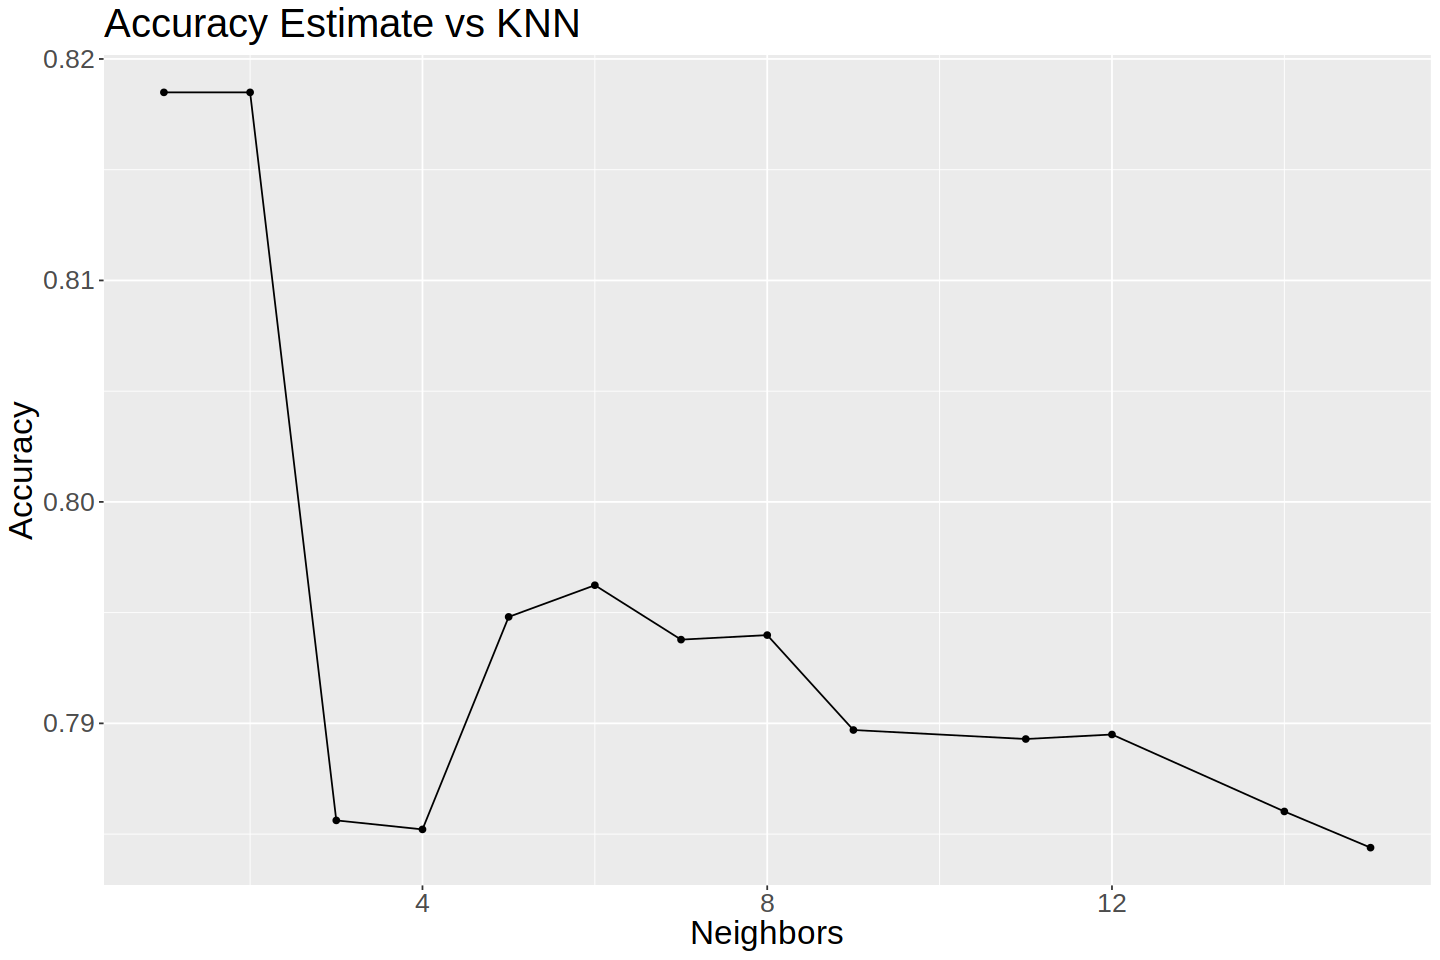

In [ ]:
set.seed(5678)

accuracies <- knn_results %>% 
    filter(.metric == "accuracy")

cross_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy", title = "Accuracy Estimate vs KNN") + 
    theme(text = element_text(size = 20)) 
cross_plot

**Figure.3. The relationship between accuracy and the number of neighbors**

### Finding the most accurate K value

In [ ]:

accurate_k <-  accuracies %>% filter(mean == max(mean)) %>% slice(1)
accurate_k

k <- accurate_k %>% pull(neighbors)
k

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.818492,10,0.004661833,Preprocessor1_Model01


[1] 1

**Table.2. The neighbor wiht the highest classification accuracy and its error on the test data**

### Using the most accurate K value to then build our Classification Model 

In [ ]:
set.seed(5678)

spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k) %>%
    set_engine("kknn") %>%
    set_mode("classification")
spec

fit <- workflow() %>%
    add_recipe(recipe) %>%
    add_model(spec) %>%
    fit(data = data)
fit 

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = k
  weight_func = rectangular

Computational engine: kknn 


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(1L,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1723152
Best kernel: rectangular
Best k: 1

### Using the new classification model to build to predict the accuracy and shown through a Confusion Matrix

In [ ]:
set.seed(5678)

prediction <- predict(fit, testing) %>%
    bind_cols(testing) 
# mnist_predictions

mnist_metrics <- prediction %>%
    metrics(truth = quality, estimate = .pred_class) 
mnist_metrics

conf_mat <- prediction %>%
    conf_mat(truth = quality, estimate = .pred_class) 
conf_mat

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,1
kap,multiclass,1


                Truth
Prediction       average Great unsatisfactory
  average            912     0              0
  Great                0   263              0
  unsatisfactory       0     0             50

**Table.3. The classification confusion matrix with k = 1**

# Results
 Data was split into 75% training and 25% testing sets. The relationship between predictor variables(physicochemical varialbe) and response variable listed in Figure 2 was visualitzed to evaluate the utility for modelling. The result showed that there was no evidence of having strong relationship between them was omitted from modeling.
 We first perform a 10-fold cross validation test. We then created a workflow based on the cross validation and recipe that we made.  
 <Br>
 After using our KNN Classification, we figured out that our best k-neighbour would be 1 as the result shown in Figure 3 and Table 2. Then we use the best_k to predict our accuracy and present it through a confusion matrix in Table 3. We got that the estimate to be 1 exactly. We also found that the standard error for our best k was very low: 0.00466. This means that our prediction was very accurate when testing our prediction data.

# Discussion
When we got the esitmate of 1 that means that our data was exactly correlated and no error was made between the prediction when we are training and testing the data. Some conclusions can we drawn from the estimate. Our original data maybe under sampled or flawed so thus when we are performing our classification we would get over repeated values and thus having no error when training our data. On the other hand, when we trained our data the seed of our data ran the exact operations needed to have the perfert perdict however this is extremely unlikely. Moreover, since we are including all of the predictors that are used in this data therefore creating such a high estiamte for the predciton because the more the predictors we use the higher the R^2 and adjusted R^2 we get from the values. 

# References

Shin, T. (2021, December 14). Predicting Wine Quality with Several Classification Techniques. Medium. https://towardsdatascience.com/predicting-wine-quality-with-several-classification-techniques-179038ea6434
<br>
<br>
McCarthy, E., & Ewing-Mulligan, M. (2019, January 30). Wine Quality How to Judge Good or Bad Wines. Dummies. https://www.dummies.com/article/home-auto-hobbies/food-drink/beverages/wine/wine-quality-how-to-judge-good-or-bad-wines-259773/
<br>
<br>
McCarthy,
S. Jackson, R. (2008). What constitutes wine quality. Science Direct. https://www.sciencedirect.com/topics/food-science/wine-quality